In [1]:
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.decomposition import PCA

from utils.data import read_dataset
from utils.image_preprocessing import preprocess_dataset
from utils.hyperparameter_optimizer import optimize_hyperparameters

%matplotlib inline

# Loading data

In [ ]:
X_raw, y = read_dataset('./data/rockpaperscissors/')
X = preprocess_dataset(X_raw, image_shape=(300,200))

In [3]:
X.shape

(2188, 60000)

In [4]:
TRAIN_SIZE = int(0.8 * y.shape[0])
X_train, y_train = X[:TRAIN_SIZE], y[:TRAIN_SIZE]
X_test, y_test = X[TRAIN_SIZE:], y[TRAIN_SIZE:]

In [5]:
X_train.shape

(1750, 60000)

### Scaled images

In [6]:
X_scaled = preprocess_dataset(X_raw, image_shape=(150, 100))
X_scaled_train, X_scaled_test = X_scaled[:TRAIN_SIZE], X_scaled[TRAIN_SIZE:]

In [7]:
X_scaled.shape

(2188, 15000)

### PCA

In [8]:
pca_model = PCA(n_components=300)
X_pca = pca_model.fit_transform(X)

X_pca_train = X_pca[:TRAIN_SIZE]
X_pca_test = X_pca[TRAIN_SIZE:]

In [9]:
X_pca.shape

(2188, 300)

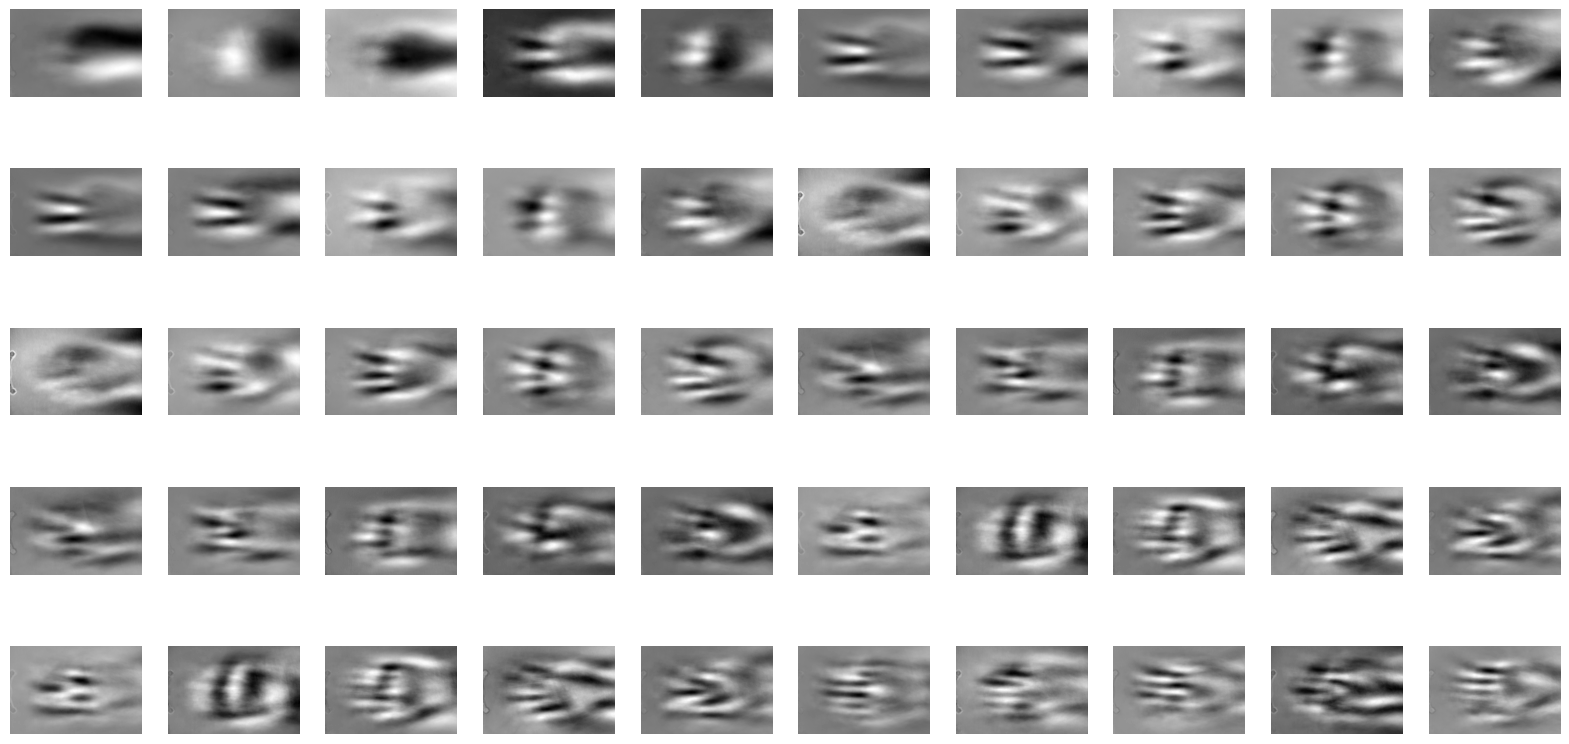

In [23]:
N,M = 5,10
fig, ax = plt.subplots(N, M, figsize=(20,10))
for i in range(N):
    for j in range(M):
        ax[i,j].imshow(pca_model.components_[N*i + j].reshape((200, 300)), cmap='gray')
        ax[i,j].axis('off')
plt.show()

# Training models

## Hyperparameter tuning

For each model we select hyperparameters that maximize mean accuracy measured by cross-validation on training set.

### KNN

#### Full images

In [10]:
knn_result = optimize_hyperparameters('knn', X_train, y_train, n_trials=100)
print(knn_result)

[I 2024-02-08 15:14:36,809] A new study created in memory with name: no-name-93ce20ac-defb-410d-9662-df543e81ec83
[I 2024-02-08 15:14:49,214] Trial 9 finished with value: 0.8222857142857144 and parameters: {'n_neighbors': 49}. Best is trial 9 with value: 0.8222857142857144.
[I 2024-02-08 15:14:57,158] Trial 10 finished with value: 0.8542857142857143 and parameters: {'n_neighbors': 28}. Best is trial 10 with value: 0.8542857142857143.
[I 2024-02-08 15:14:57,557] Trial 1 finished with value: 0.8742857142857143 and parameters: {'n_neighbors': 18}. Best is trial 1 with value: 0.8742857142857143.
[I 2024-02-08 15:14:59,656] Trial 2 finished with value: 0.905142857142857 and parameters: {'n_neighbors': 5}. Best is trial 2 with value: 0.905142857142857.
[I 2024-02-08 15:14:59,980] Trial 5 finished with value: 0.8571428571428571 and parameters: {'n_neighbors': 26}. Best is trial 2 with value: 0.905142857142857.
[I 2024-02-08 15:15:02,805] Trial 7 finished with value: 0.8805714285714286 and par

FrozenTrial(number=21, state=1, values=[0.9125714285714286], datetime_start=datetime.datetime(2024, 2, 8, 15, 15, 6, 40561), datetime_complete=datetime.datetime(2024, 2, 8, 15, 15, 28, 234207), params={'n_neighbors': 3}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_neighbors': IntDistribution(high=49, log=False, low=3, step=1)}, trial_id=21, value=None)


In [11]:
knn_result.params

{'n_neighbors': 3}

In [12]:
knn_result.value

0.9125714285714286

In [13]:
best_knn_model = KNeighborsClassifier(n_jobs=-1, **knn_result.params)
best_knn_model.fit(X_train, y_train)
best_knn_model.score(X_test, y_test)

0.9041095890410958

#### Scaled images

In [14]:
knn_scaled_result = optimize_hyperparameters('knn', X_scaled_train, y_train, n_trials=100)
print(knn_scaled_result)

[I 2024-02-08 15:18:05,390] A new study created in memory with name: no-name-87ce219a-7d2e-4381-8f35-447717d482ad
[I 2024-02-08 15:18:06,310] Trial 0 finished with value: 0.8885714285714286 and parameters: {'n_neighbors': 14}. Best is trial 0 with value: 0.8885714285714286.
[I 2024-02-08 15:18:06,985] Trial 2 finished with value: 0.8788571428571428 and parameters: {'n_neighbors': 19}. Best is trial 0 with value: 0.8885714285714286.
[I 2024-02-08 15:18:07,529] Trial 1 finished with value: 0.8657142857142857 and parameters: {'n_neighbors': 24}. Best is trial 0 with value: 0.8885714285714286.
[I 2024-02-08 15:18:07,944] Trial 3 finished with value: 0.8777142857142858 and parameters: {'n_neighbors': 18}. Best is trial 0 with value: 0.8885714285714286.
[I 2024-02-08 15:18:08,432] Trial 4 finished with value: 0.8514285714285714 and parameters: {'n_neighbors': 32}. Best is trial 0 with value: 0.8885714285714286.
[I 2024-02-08 15:18:08,962] Trial 5 finished with value: 0.8794285714285716 and p

FrozenTrial(number=22, state=1, values=[0.9154285714285715], datetime_start=datetime.datetime(2024, 2, 8, 15, 18, 11, 464627), datetime_complete=datetime.datetime(2024, 2, 8, 15, 18, 17, 566998), params={'n_neighbors': 3}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_neighbors': IntDistribution(high=49, log=False, low=3, step=1)}, trial_id=22, value=None)


In [15]:
knn_scaled_result.params

{'n_neighbors': 3}

In [16]:
knn_scaled_result.value

0.9154285714285715

In [17]:
best_knn_model_scaled = KNeighborsClassifier(n_jobs=-1, **knn_scaled_result.params)
best_knn_model_scaled.fit(X_scaled_train, y_train)
best_knn_model_scaled.score(X_scaled_test, y_test)

0.906392694063927

#### PCA

In [18]:
knn_pca_result = optimize_hyperparameters('knn', X_pca_train, y_train, n_trials=100)
print(knn_pca_result)

[I 2024-02-08 15:18:59,209] A new study created in memory with name: no-name-06bc29f9-fe7d-4b75-9db3-71bfd9233fd1
[I 2024-02-08 15:18:59,369] Trial 4 finished with value: 0.8411428571428573 and parameters: {'n_neighbors': 38}. Best is trial 4 with value: 0.8411428571428573.
[I 2024-02-08 15:18:59,372] Trial 8 finished with value: 0.8588571428571429 and parameters: {'n_neighbors': 29}. Best is trial 8 with value: 0.8588571428571429.
[I 2024-02-08 15:18:59,378] Trial 9 finished with value: 0.8651428571428571 and parameters: {'n_neighbors': 24}. Best is trial 9 with value: 0.8651428571428571.
[I 2024-02-08 15:18:59,392] Trial 5 finished with value: 0.8314285714285715 and parameters: {'n_neighbors': 42}. Best is trial 9 with value: 0.8651428571428571.
[I 2024-02-08 15:18:59,405] Trial 1 finished with value: 0.9040000000000001 and parameters: {'n_neighbors': 9}. Best is trial 1 with value: 0.9040000000000001.
[I 2024-02-08 15:18:59,423] Trial 3 finished with value: 0.9062857142857143 and pa

FrozenTrial(number=27, state=1, values=[0.9194285714285714], datetime_start=datetime.datetime(2024, 2, 8, 15, 18, 59, 602355), datetime_complete=datetime.datetime(2024, 2, 8, 15, 18, 59, 722642), params={'n_neighbors': 3}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_neighbors': IntDistribution(high=49, log=False, low=3, step=1)}, trial_id=27, value=None)


In [19]:
knn_pca_result.params

{'n_neighbors': 3}

In [20]:
knn_pca_result.value

0.9194285714285714

In [21]:
best_knn_model_pca = KNeighborsClassifier(n_jobs=-1, **knn_pca_result.params)
best_knn_model_pca.fit(X_pca_train, y_train)
best_knn_model_pca.score(X_pca_test, y_test)

0.910958904109589

### Decision Tree

#### Full images (too slow - not worth)

In [ ]:
decision_tree_result = optimize_hyperparameters('decision_tree', X_train, y_train, n_trials=100)
print(decision_tree_result)

In [ ]:
decision_tree_result.params

In [ ]:
decision_tree_result.value

In [ ]:
best_decision_tree_model = DecisionTreeClassifier(**decision_tree_result.params)
best_decision_tree_model.fit(X_train, y_train)
best_decision_tree_model.score(X_test, y_test)

#### Scaled images

In [14]:
decision_tree_scaled_result = optimize_hyperparameters('decision_tree', X_scaled_train, y_train, n_trials=100)
print(decision_tree_scaled_result)

[I 2024-02-08 18:47:54,199] A new study created in memory with name: no-name-394ee3d6-df38-4b81-b2b9-58616f7f8417
[I 2024-02-08 18:48:05,177] Trial 1 finished with value: 0.7702857142857144 and parameters: {'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_leaf_nodes': 14}. Best is trial 1 with value: 0.7702857142857144.
[I 2024-02-08 18:48:12,524] Trial 0 finished with value: 0.6531428571428571 and parameters: {'max_depth': 22, 'min_samples_split': 7, 'min_samples_leaf': 11, 'max_leaf_nodes': 4}. Best is trial 1 with value: 0.7702857142857144.
[I 2024-02-08 18:48:24,661] Trial 7 finished with value: 0.7971428571428572 and parameters: {'max_depth': 8, 'min_samples_split': 40, 'min_samples_leaf': 3, 'max_leaf_nodes': 13}. Best is trial 7 with value: 0.7971428571428572.
[I 2024-02-08 18:48:32,595] Trial 4 finished with value: 0.692 and parameters: {'max_depth': 24, 'min_samples_split': 25, 'min_samples_leaf': 3, 'max_leaf_nodes': 6}. Best is trial 7 with value: 0.797142

FrozenTrial(number=25, state=1, values=[0.8377142857142857], datetime_start=datetime.datetime(2024, 2, 8, 18, 50, 8, 32912), datetime_complete=datetime.datetime(2024, 2, 8, 18, 52, 20, 345869), params={'max_depth': 30, 'min_samples_split': 19, 'min_samples_leaf': 7, 'max_leaf_nodes': 30}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=30, log=False, low=2, step=1), 'min_samples_split': IntDistribution(high=40, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=20, log=False, low=1, step=1), 'max_leaf_nodes': IntDistribution(high=30, log=False, low=3, step=1)}, trial_id=25, value=None)


In [15]:
decision_tree_scaled_result.params

{'max_depth': 30,
 'min_samples_split': 19,
 'min_samples_leaf': 7,
 'max_leaf_nodes': 30}

In [16]:
decision_tree_scaled_result.value

0.8377142857142857

In [19]:
best_decision_tree_model_scaled = DecisionTreeClassifier(**decision_tree_scaled_result.params)
best_decision_tree_model_scaled.fit(X_scaled_train, y_train)
best_decision_tree_model_scaled.score(X_scaled_test, y_test)

0.8036529680365296

#### PCA

In [10]:
decision_tree_pca_result = optimize_hyperparameters('decision_tree', X_pca_train, y_train, n_trials=1000)
print(decision_tree_pca_result)

[I 2024-02-08 18:42:52,124] A new study created in memory with name: no-name-fa6502e5-a299-4f2b-94b7-34f1ddaf62eb
[I 2024-02-08 18:42:53,994] Trial 4 finished with value: 0.7782857142857142 and parameters: {'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_leaf_nodes': 28}. Best is trial 4 with value: 0.7782857142857142.
[I 2024-02-08 18:42:54,168] Trial 5 finished with value: 0.7691428571428571 and parameters: {'max_depth': 28, 'min_samples_split': 30, 'min_samples_leaf': 15, 'max_leaf_nodes': 16}. Best is trial 4 with value: 0.7782857142857142.
[I 2024-02-08 18:42:54,845] Trial 3 finished with value: 0.7314285714285715 and parameters: {'max_depth': 22, 'min_samples_split': 20, 'min_samples_leaf': 15, 'max_leaf_nodes': 10}. Best is trial 4 with value: 0.7782857142857142.
[I 2024-02-08 18:42:54,883] Trial 10 finished with value: 0.7291428571428572 and parameters: {'max_depth': 11, 'min_samples_split': 13, 'min_samples_leaf': 19, 'max_leaf_nodes': 9}. Best is trial 4 

FrozenTrial(number=288, state=1, values=[0.7845714285714286], datetime_start=datetime.datetime(2024, 2, 8, 18, 44, 2, 176742), datetime_complete=datetime.datetime(2024, 2, 8, 18, 44, 5, 175737), params={'max_depth': 26, 'min_samples_split': 36, 'min_samples_leaf': 9, 'max_leaf_nodes': 25}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=30, log=False, low=2, step=1), 'min_samples_split': IntDistribution(high=40, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=20, log=False, low=1, step=1), 'max_leaf_nodes': IntDistribution(high=30, log=False, low=3, step=1)}, trial_id=288, value=None)


In [11]:
decision_tree_pca_result.params

{'max_depth': 26,
 'min_samples_split': 36,
 'min_samples_leaf': 9,
 'max_leaf_nodes': 25}

In [12]:
decision_tree_pca_result.value

0.7845714285714286

In [13]:
best_decision_tree_model_pca = DecisionTreeClassifier(**decision_tree_pca_result.params)
best_decision_tree_model_pca.fit(X_pca_train, y_train)
best_decision_tree_model_pca.score(X_pca_test, y_test)

0.7488584474885844

### Random Forest

#### Full images

In [ ]:
random_forest_result = optimize_hyperparameters('random_forest', X_train, y_train, n_trials=100)
print(random_forest_result)

In [ ]:
random_forest_result.params

In [ ]:
random_forest_result.value

In [ ]:
best_random_forest_model = RandomForestClassifier(**random_forest_result.params)
best_random_forest_model.fit(X_train, y_train)
best_random_forest_model.score(X_test, y_test)

#### Scaled images

In [18]:
random_forest_scaled_result = optimize_hyperparameters('random_forest', X_scaled_train, y_train, n_trials=100)
print(random_forest_scaled_result)

[I 2024-02-08 19:39:01,313] A new study created in memory with name: no-name-15a84b8a-033c-45a3-9664-97da78e0da90
[I 2024-02-08 19:39:15,376] Trial 0 finished with value: 0.8988571428571429 and parameters: {'n_estimators': 202, 'max_depth': 64, 'min_samples_split': 37, 'min_samples_leaf': 12, 'max_leaf_nodes': 14}. Best is trial 0 with value: 0.8988571428571429.
[I 2024-02-08 19:39:59,781] Trial 1 finished with value: 0.876 and parameters: {'n_estimators': 840, 'max_depth': 4, 'min_samples_split': 34, 'min_samples_leaf': 10, 'max_leaf_nodes': 34}. Best is trial 0 with value: 0.8988571428571429.
[I 2024-02-08 19:40:11,011] Trial 3 finished with value: 0.9228571428571428 and parameters: {'n_estimators': 230, 'max_depth': 65, 'min_samples_split': 6, 'min_samples_leaf': 17, 'max_leaf_nodes': 66}. Best is trial 3 with value: 0.9228571428571428.
[I 2024-02-08 19:41:10,377] Trial 2 finished with value: 0.9177142857142856 and parameters: {'n_estimators': 897, 'max_depth': 20, 'min_samples_spli

FrozenTrial(number=78, state=1, values=[0.9474285714285713], datetime_start=datetime.datetime(2024, 2, 8, 20, 28, 32, 157675), datetime_complete=datetime.datetime(2024, 2, 8, 20, 42, 47, 588277), params={'n_estimators': 930, 'max_depth': 48, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_leaf_nodes': 66}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=1000, log=False, low=100, step=1), 'max_depth': IntDistribution(high=70, log=False, low=2, step=1), 'min_samples_split': IntDistribution(high=40, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=20, log=False, low=1, step=1), 'max_leaf_nodes': IntDistribution(high=70, log=False, low=3, step=1)}, trial_id=78, value=None)


In [19]:
random_forest_scaled_result.params

{'n_estimators': 930,
 'max_depth': 48,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_leaf_nodes': 66}

In [20]:
random_forest_scaled_result.value

0.9474285714285713

In [21]:
best_random_forest_model_scaled = RandomForestClassifier(**random_forest_scaled_result.params)
best_random_forest_model_scaled.fit(X_scaled_train, y_train)
best_random_forest_model_scaled.score(X_scaled_test, y_test)

0.9383561643835616

#### PCA

In [14]:
random_forest_pca_result = optimize_hyperparameters('random_forest', X_pca_train, y_train, n_trials=100)
print(random_forest_pca_result)

[I 2024-02-08 19:25:23,775] A new study created in memory with name: no-name-0e5cce60-cd4e-4ef4-95cc-f937edbe52c3
[I 2024-02-08 19:25:33,078] Trial 2 finished with value: 0.8154285714285715 and parameters: {'n_estimators': 851, 'max_depth': 19, 'min_samples_split': 36, 'min_samples_leaf': 16, 'max_leaf_nodes': 6}. Best is trial 2 with value: 0.8154285714285715.
[I 2024-02-08 19:25:40,092] Trial 0 finished with value: 0.8794285714285713 and parameters: {'n_estimators': 493, 'max_depth': 18, 'min_samples_split': 23, 'min_samples_leaf': 5, 'max_leaf_nodes': 60}. Best is trial 0 with value: 0.8794285714285713.
[I 2024-02-08 19:25:50,838] Trial 1 finished with value: 0.8565714285714285 and parameters: {'n_estimators': 960, 'max_depth': 10, 'min_samples_split': 30, 'min_samples_leaf': 19, 'max_leaf_nodes': 48}. Best is trial 0 with value: 0.8794285714285713.
[I 2024-02-08 19:25:53,375] Trial 7 finished with value: 0.8639999999999999 and parameters: {'n_estimators': 394, 'max_depth': 36, 'min

FrozenTrial(number=23, state=1, values=[0.892], datetime_start=datetime.datetime(2024, 2, 8, 19, 26, 48, 204342), datetime_complete=datetime.datetime(2024, 2, 8, 19, 27, 54, 981862), params={'n_estimators': 541, 'max_depth': 37, 'min_samples_split': 23, 'min_samples_leaf': 1, 'max_leaf_nodes': 70}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=1000, log=False, low=100, step=1), 'max_depth': IntDistribution(high=70, log=False, low=2, step=1), 'min_samples_split': IntDistribution(high=40, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=20, log=False, low=1, step=1), 'max_leaf_nodes': IntDistribution(high=70, log=False, low=3, step=1)}, trial_id=23, value=None)


In [15]:
random_forest_pca_result.params

{'n_estimators': 541,
 'max_depth': 37,
 'min_samples_split': 23,
 'min_samples_leaf': 1,
 'max_leaf_nodes': 70}

In [16]:
random_forest_pca_result.value

0.892

In [17]:
best_random_forest_model_pca = RandomForestClassifier(**random_forest_pca_result.params)
best_random_forest_model_pca.fit(X_pca_train, y_train)
best_random_forest_model_pca.score(X_pca_test, y_test)

0.8972602739726028

### SVM

#### Full images

In [ ]:
svm_result = optimize_hyperparameters('svm', X_train, y_train, n_trials=100)
print(svm_result)

In [ ]:
svm_result.params

In [ ]:
svm_result.value

In [ ]:
best_svm_model = SVC(**svm_result.params)
best_svm_model.fit(X_train, y_train)
best_svm_model.score(X_test, y_test)

#### Scaled images

In [ ]:
svm_scaled_result = optimize_hyperparameters('svm', X_scaled_train, y_train, n_trials=100)
print(svm_scaled_result)

In [ ]:
svm_scaled_result.params

In [ ]:
svm_scaled_result.value

In [ ]:
best_svm_model_scaled = SVC(**svm_scaled_result.params)
best_svm_model_scaled.fit(X_scaled_train, y_train)
best_svm_model_scaled.score(X_scaled_test, y_test)

#### PCA

In [10]:
svm_pca_result = optimize_hyperparameters('svm', X_pca_train, y_train, n_trials=500)
print(svm_pca_result)

[I 2024-02-08 22:40:27,375] A new study created in memory with name: no-name-e4f9e142-6f14-45eb-ae56-40339c41ded4
[I 2024-02-08 22:40:29,354] Trial 2 finished with value: 0.8954285714285714 and parameters: {'C': 10.465966431799071, 'kernel': 'poly', 'gamma': 0.7425179121149845, 'degree': 3}. Best is trial 2 with value: 0.8954285714285714.
[I 2024-02-08 22:40:30,173] Trial 1 finished with value: 0.909142857142857 and parameters: {'C': 58.10243405987361, 'kernel': 'poly', 'gamma': 0.23108148975046872, 'degree': 4}. Best is trial 1 with value: 0.909142857142857.
[I 2024-02-08 22:40:31,940] Trial 0 finished with value: 0.8954285714285714 and parameters: {'C': 2.3525218798674885, 'kernel': 'poly', 'gamma': 0.5228045898089086, 'degree': 3}. Best is trial 1 with value: 0.909142857142857.
[I 2024-02-08 22:40:32,483] Trial 9 finished with value: 0.8382857142857143 and parameters: {'C': 27.097361132990635, 'kernel': 'poly', 'gamma': 0.5804126684016968, 'degree': 5}. Best is trial 1 with value: 0

FrozenTrial(number=6, state=1, values=[0.9314285714285715], datetime_start=datetime.datetime(2024, 2, 8, 22, 40, 27, 385274), datetime_complete=datetime.datetime(2024, 2, 8, 22, 40, 33, 634823), params={'C': 28.981460342116105, 'kernel': 'poly', 'gamma': 0.2672611424101214, 'degree': 2}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'C': FloatDistribution(high=100.0, log=False, low=0.05, step=None), 'kernel': CategoricalDistribution(choices=('poly',)), 'gamma': FloatDistribution(high=1.0, log=False, low=1e-05, step=None), 'degree': IntDistribution(high=9, log=False, low=2, step=1)}, trial_id=6, value=None)


In [11]:
svm_pca_result.params

{'C': 28.981460342116105,
 'kernel': 'poly',
 'gamma': 0.2672611424101214,
 'degree': 2}

In [12]:
svm_pca_result.value

0.9314285714285715

In [13]:
best_svm_model_pca = SVC(**svm_pca_result.params)
best_svm_model_pca.fit(X_pca_train, y_train)
best_svm_model_pca.score(X_pca_test, y_test)

0.952054794520548

### XGBoost

#### Full images

In [ ]:
xgboost_result = optimize_hyperparameters('xgboost', X_train, y_train, n_trials=100)
print(xgboost_result)

In [ ]:
xgboost_result.params

In [ ]:
xgboost_result.value

In [ ]:
best_xgboost_model = XGBClassifier(**xgboost_result.params)
best_xgboost_model.fit(X_train, y_train)
best_xgboost_model.score(X_test, y_test)

#### Scaled images

In [ ]:
xgboost_scaled_result = optimize_hyperparameters('xgboost', X_scaled_train, y_train, n_trials=100)
print(xgboost_scaled_result)

In [ ]:
xgboost_scaled_result.params

In [ ]:
xgboost_scaled_result.value

In [ ]:
best_xgboost_model_scaled = XGBClassifier(**xgboost_scaled_result.params)
best_xgboost_model_scaled.fit(X_scaled_train, y_train)
best_xgboost_model_scaled.score(X_scaled_test, y_test)

#### PCA

In [10]:
xgboost_pca_result = optimize_hyperparameters('xgboost', X_pca_train, y_train, n_trials=100)
print(xgboost_pca_result)

[I 2024-02-08 23:18:42,163] A new study created in memory with name: no-name-909cebad-d40e-4bc5-a11b-42ff10272e4b
[I 2024-02-08 23:22:34,534] Trial 6 finished with value: 0.901142857142857 and parameters: {'max_depth': 11, 'n_estimators': 245, 'learning_rate': 0.14999318335518755, 'subsample': 0.5328473003318795, 'reg_alpha': 1.4617723614516298, 'reg_lambda': 0.12444264488120138}. Best is trial 6 with value: 0.901142857142857.
[I 2024-02-08 23:22:38,212] Trial 10 finished with value: 0.8959999999999999 and parameters: {'max_depth': 7, 'n_estimators': 227, 'learning_rate': 0.056796333331029, 'subsample': 0.6564222555650128, 'reg_alpha': 4.825888258586717, 'reg_lambda': 0.8066735554969023}. Best is trial 6 with value: 0.901142857142857.
[I 2024-02-08 23:22:43,107] Trial 1 finished with value: 0.8868571428571428 and parameters: {'max_depth': 3, 'n_estimators': 266, 'learning_rate': 0.10795551120868592, 'subsample': 0.6329099202172607, 'reg_alpha': 4.161424962260347, 'reg_lambda': 0.662366

FrozenTrial(number=86, state=1, values=[0.9148571428571429], datetime_start=datetime.datetime(2024, 2, 8, 23, 43, 24, 398768), datetime_complete=datetime.datetime(2024, 2, 8, 23, 48, 18, 601449), params={'max_depth': 9, 'n_estimators': 240, 'learning_rate': 0.1869692858938882, 'subsample': 0.8148988788350044, 'reg_alpha': 0.25333944141862585, 'reg_lambda': 4.701325226268406}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=12, log=False, low=3, step=1), 'n_estimators': IntDistribution(high=300, log=False, low=50, step=1), 'learning_rate': FloatDistribution(high=0.2, log=False, low=0.01, step=None), 'subsample': FloatDistribution(high=1.0, log=False, low=0.5, step=None), 'reg_alpha': FloatDistribution(high=5.0, log=False, low=0.0, step=None), 'reg_lambda': FloatDistribution(high=5.0, log=False, low=0.0, step=None)}, trial_id=86, value=None)


In [11]:
xgboost_pca_result.params

{'max_depth': 9,
 'n_estimators': 240,
 'learning_rate': 0.1869692858938882,
 'subsample': 0.8148988788350044,
 'reg_alpha': 0.25333944141862585,
 'reg_lambda': 4.701325226268406}

In [12]:
xgboost_pca_result.value

0.9148571428571429

In [13]:
best_xgboost_model_pca = XGBClassifier(**xgboost_pca_result.params)
best_xgboost_model_pca.fit(X_pca_train, y_train)
best_xgboost_model_pca.score(X_pca_test, y_test)

0.8972602739726028